In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
online = pd.read_csv('../DATASETS/part3/chapter1/online.csv')
online['InvoiceDate'] = pd.to_datetime(online['InvoiceDate'])
print(online.head())

   Unnamed: 0  InvoiceNo StockCode                      Description  Quantity  \
0      416792     572558     22745       POPPY'S PLAYHOUSE BEDROOM          6   
1      482904     577485     23196    VINTAGE LEAF MAGNETIC NOTEPAD         1   
2      263743     560034     23299     FOOD COVER WITH BEADS SET 2          6   
3      495549     578307    72349B  SET/6 PURPLE BUTTERFLY T-LIGHTS         1   
4      204384     554656     21756         BATH BUILDING BLOCK WORD         3   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2011-10-25 08:26:00       2.10       14286  United Kingdom  
1 2011-11-20 11:56:00       1.45       16360  United Kingdom  
2 2011-07-14 13:35:00       3.75       13933  United Kingdom  
3 2011-11-23 15:53:00       2.10       17290  United Kingdom  
4 2011-05-25 13:36:00       5.95       17663  United Kingdom  


In [3]:
def get_day(x):
    return dt.datetime(x.year, x.month, x.day)

def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [4]:
online['InvoiceDay'] = online['InvoiceDate'].apply(get_day)

online['InvoiceMonth'] = online['InvoiceDate'].apply(get_month)
online.head()


,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-10-01
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-11-01
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-01
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-11-01
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-05-01


In [5]:
grouping = online.groupby('CustomerID')['InvoiceDay']
grouping.head()

0       2011-10-25
1       2011-11-20
2       2011-07-14
3       2011-11-23
4       2011-05-25
           ...    
70816   2011-10-14
70817   2011-12-05
70848   2011-02-23
70857   2011-12-06
70860   2010-12-09
Name: InvoiceDay, Length: 15619, dtype: datetime64[ns]

In [6]:
online['CohortDay'] = grouping.transform('min')

In [7]:
grouping = online.groupby('CustomerID')['InvoiceMonth']
online['CohortMonth'] = grouping.transform('min')

In [8]:
online.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,CohortDay,CohortMonth
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-10-01,2011-04-11,2011-04-01
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-11-01,2011-09-12,2011-09-01
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-01,2011-07-14,2011-07-01
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-11-01,2011-11-23,2011-11-01
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-05-01,2011-02-25,2011-02-01


# Calculating Time Offset

In [9]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [10]:
# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, invoice_day = get_date_int(online, 'InvoiceDay')

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, cohort_day = get_date_int(online, 'CohortDay')

In [11]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
days_diff = invoice_day - cohort_day

# Extract the difference in days from all previous values
online['CohortIndex'] = years_diff * 365 + months_diff * 30 + days_diff + 1
print(online.head())

   Unnamed: 0  InvoiceNo StockCode                      Description  Quantity  \
0      416792     572558     22745       POPPY'S PLAYHOUSE BEDROOM          6   
1      482904     577485     23196    VINTAGE LEAF MAGNETIC NOTEPAD         1   
2      263743     560034     23299     FOOD COVER WITH BEADS SET 2          6   
3      495549     578307    72349B  SET/6 PURPLE BUTTERFLY T-LIGHTS         1   
4      204384     554656     21756         BATH BUILDING BLOCK WORD         3   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceDay  \
0 2011-10-25 08:26:00       2.10       14286  United Kingdom 2011-10-25   
1 2011-11-20 11:56:00       1.45       16360  United Kingdom 2011-11-20   
2 2011-07-14 13:35:00       3.75       13933  United Kingdom 2011-07-14   
3 2011-11-23 15:53:00       2.10       17290  United Kingdom 2011-11-23   
4 2011-05-25 13:36:00       5.95       17663  United Kingdom 2011-05-25   

  InvoiceMonth  CohortDay CohortMonth  CohortIndex  
0   2011-

In [12]:
grouping = online.groupby(['CohortMonth','CohortIndex'])
grouping.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,CohortDay,CohortMonth,CohortIndex
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-10-01,2011-04-11,2011-04-01,195
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-11-01,2011-09-12,2011-09-01,69
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-01,2011-07-14,2011-07-01,1
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-11-01,2011-11-23,2011-11-01,1
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-05-01,2011-02-25,2011-02-01,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70496,249853,558924,22197,POPCORN HOLDER,100,2011-07-05 10:07:00,0.72,15785,United Kingdom,2011-07-05,2011-07-01,2011-02-17,2011-02-01,139
70604,281487,561531,21933,PINK VINTAGE PAISLEY PICNIC BAG,20,2011-07-28 09:27:00,1.65,14364,United Kingdom,2011-07-28,2011-07-01,2011-05-12,2011-05-01,77
70617,313471,564503,21786,POLKADOT RAIN HAT,24,2011-08-25 14:23:00,0.42,13971,United Kingdom,2011-08-25,2011-08-01,2011-02-27,2011-02-01,179
70655,271460,560695,22616,PACK OF 12 LONDON TISSUES,240,2011-07-20 12:08:00,0.25,14101,United Kingdom,2011-07-20,2011-07-01,2011-01-17,2011-01-01,184


In [13]:
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()
print(cohort_data)

     CohortMonth  CohortIndex  CustomerID
0     2010-12-01            1         716
1     2010-12-01            2           7
2     2010-12-01            3           9
3     2010-12-01            4           7
4     2010-12-01            5          15
...          ...          ...         ...
2094  2011-11-01           35           2
2095  2011-11-01           36           1
2096  2011-11-01           37           1
2097  2011-11-01           38           1
2098  2011-12-01            1          38

[2099 rows x 3 columns]


In [14]:
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
print(cohort_counts)

CohortIndex    1    2    3    4     5     6     7     8     9    10   ...  \
CohortMonth                                                           ...   
2010-12-01   716.0  7.0  9.0  7.0  15.0  14.0  16.0  25.0  25.0  9.0  ...   
2011-01-01   332.0  NaN  1.0  1.0   1.0   NaN   NaN   2.0   NaN  1.0  ...   
2011-02-01   316.0  NaN  NaN  1.0   NaN   3.0   NaN   2.0   1.0  NaN  ...   
2011-03-01   388.0  NaN  1.0  NaN   2.0   2.0   NaN   2.0   1.0  NaN  ...   
2011-04-01   255.0  NaN  1.0  NaN   1.0   NaN   1.0   1.0   1.0  1.0  ...   
2011-05-01   249.0  1.0  NaN  NaN   1.0   1.0   NaN   2.0   NaN  1.0  ...   
2011-06-01   207.0  3.0  1.0  NaN   NaN   NaN   1.0   NaN   3.0  NaN  ...   
2011-07-01   173.0  NaN  NaN  NaN   1.0   NaN   1.0   1.0   NaN  NaN  ...   
2011-08-01   139.0  NaN  1.0  1.0   NaN   NaN   NaN   NaN   NaN  2.0  ...   
2011-09-01   279.0  NaN  1.0  1.0   NaN   1.0   NaN   4.0   2.0  1.0  ...   
2011-10-01   318.0  NaN  NaN  1.0   1.0   NaN   5.0   5.0   2.0  1.0  ...   

In [15]:
cohort_sizes = cohort_counts.iloc[:,0]
print(cohort_sizes)

CohortMonth
2010-12-01    716.0
2011-01-01    332.0
2011-02-01    316.0
2011-03-01    388.0
2011-04-01    255.0
2011-05-01    249.0
2011-06-01    207.0
2011-07-01    173.0
2011-08-01    139.0
2011-09-01    279.0
2011-10-01    318.0
2011-11-01    291.0
2011-12-01     38.0
Name: 1, dtype: float64


In [16]:
retention = cohort_counts.divide(cohort_sizes, axis = 0)
print(retention)

CohortIndex  1         2         3         4         5         6         7    \
CohortMonth                                                                    
2010-12-01   1.0  0.009777  0.012570  0.009777  0.020950  0.019553  0.022346   
2011-01-01   1.0       NaN  0.003012  0.003012  0.003012       NaN       NaN   
2011-02-01   1.0       NaN       NaN  0.003165       NaN  0.009494       NaN   
2011-03-01   1.0       NaN  0.002577       NaN  0.005155  0.005155       NaN   
2011-04-01   1.0       NaN  0.003922       NaN  0.003922       NaN  0.003922   
2011-05-01   1.0  0.004016       NaN       NaN  0.004016  0.004016       NaN   
2011-06-01   1.0  0.014493  0.004831       NaN       NaN       NaN  0.004831   
2011-07-01   1.0       NaN       NaN       NaN  0.005780       NaN  0.005780   
2011-08-01   1.0       NaN  0.007194  0.007194       NaN       NaN       NaN   
2011-09-01   1.0       NaN  0.003584  0.003584       NaN  0.003584       NaN   
2011-10-01   1.0       NaN       NaN  0.

# Calculating average price

In [17]:
grouping = online.groupby(['CohortMonth', 'CohortIndex'])
grouping.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,InvoiceMonth,CohortDay,CohortMonth,CohortIndex
0,416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25,2011-10-01,2011-04-11,2011-04-01,195
1,482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20,2011-11-01,2011-09-12,2011-09-01,69
2,263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14,2011-07-01,2011-07-14,2011-07-01,1
3,495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23,2011-11-01,2011-11-23,2011-11-01,1
4,204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25,2011-05-01,2011-02-25,2011-02-01,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70496,249853,558924,22197,POPCORN HOLDER,100,2011-07-05 10:07:00,0.72,15785,United Kingdom,2011-07-05,2011-07-01,2011-02-17,2011-02-01,139
70604,281487,561531,21933,PINK VINTAGE PAISLEY PICNIC BAG,20,2011-07-28 09:27:00,1.65,14364,United Kingdom,2011-07-28,2011-07-01,2011-05-12,2011-05-01,77
70617,313471,564503,21786,POLKADOT RAIN HAT,24,2011-08-25 14:23:00,0.42,13971,United Kingdom,2011-08-25,2011-08-01,2011-02-27,2011-02-01,179
70655,271460,560695,22616,PACK OF 12 LONDON TISSUES,240,2011-07-20 12:08:00,0.25,14101,United Kingdom,2011-07-20,2011-07-01,2011-01-17,2011-01-01,184


In [18]:
cohort_data =grouping['UnitPrice'].mean()
cohort_data = cohort_data.reset_index()
print(cohort_data)

     CohortMonth  CohortIndex  UnitPrice
0     2010-12-01            1   2.940446
1     2010-12-01            2   2.510323
2     2010-12-01            3   2.915909
3     2010-12-01            4   2.725366
4     2010-12-01            5   3.118553
...          ...          ...        ...
2094  2011-11-01           35   1.666667
2095  2011-11-01           36   2.776667
2096  2011-11-01           37   0.390000
2097  2011-11-01           38  12.750000
2098  2011-12-01            1   1.854375

[2099 rows x 3 columns]


In [19]:
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
print(average_price)

CohortIndex       1         2         3         4         5         6    \
CohortMonth                                                               
2010-12-01   2.940446  2.510323  2.915909  2.725366  3.118553  2.779452   
2011-01-01   3.198023       NaN  2.156667  2.530000  1.550000       NaN   
2011-02-01   3.110437       NaN       NaN  1.350000       NaN  0.861667   
2011-03-01   3.422035       NaN  2.950000       NaN  1.145000  2.301053   
2011-04-01   3.351330       NaN  0.420000       NaN  3.800000       NaN   
2011-05-01   3.105080  4.616667       NaN       NaN  6.025000  4.800000   
2011-06-01   2.843178  2.075000  3.240000       NaN       NaN       NaN   
2011-07-01   3.253654       NaN       NaN       NaN  0.950000       NaN   
2011-08-01   2.885815       NaN  5.958000  4.950000       NaN       NaN   
2011-09-01   2.927485       NaN  2.516667  2.600000       NaN  2.880769   
2011-10-01   2.957478       NaN       NaN  2.577273  2.934000       NaN   
2011-11-01   2.468932  1.

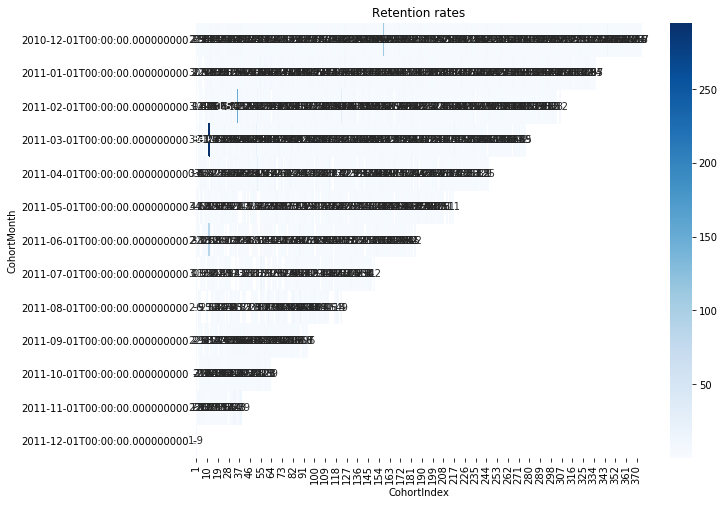

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.title('Retention rates')

sns.heatmap(data=average_price,
           annot=True,
           cmap='Blues')

plt.show()